# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [67]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [68]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [69]:
city1 = City(3,5)

In [70]:
city1

(3,5)

In [71]:
city2 = City(5,7)

In [72]:
city1.distance(city2)

2.8284271247461903

In [73]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [74]:
route1 = []
route1.append(city1)
route1.append(city2)

In [75]:
route1

[(3,5), (5,7)]

In [76]:
fitness1 = Fitness(route1).routeFitness()

In [77]:
fitness1

0.17677669529663687

In [78]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [79]:
route1

[(3,5), (5,7)]

In [80]:
citylist1 = route1

In [81]:
route1.append(City(8,8))

In [82]:
route1.append(City(9,1))

In [83]:
route1

[(3,5), (5,7), (8,8), (9,1)]

In [84]:
citylist1=route1

In [85]:
citylist1

[(3,5), (5,7), (8,8), (9,1)]

In [86]:
createRoute(citylist1)

[(9,1), (8,8), (5,7), (3,5)]

In [87]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [236]:
a = initialPopulation(citylist1,10)

In [237]:
a

[[(9,1), (5,7), (3,5), (8,8)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(3,5), (5,7), (8,8), (9,1)],
 [(3,5), (5,7), (8,8), (9,1)],
 [(3,5), (8,8), (5,7), (9,1)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(8,8), (9,1), (5,7), (3,5)]]

In [238]:
a

[[(9,1), (5,7), (3,5), (8,8)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(3,5), (5,7), (8,8), (9,1)],
 [(3,5), (5,7), (8,8), (9,1)],
 [(3,5), (8,8), (5,7), (9,1)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(8,8), (9,1), (5,7), (3,5)]]

In [239]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [240]:
poprank

{0: 0.043589035044329795,
 1: 0.04358903504432979,
 2: 0.049326994455103544,
 3: 0.043589035044329795,
 4: 0.04358903504432979,
 5: 0.04932699445510354,
 6: 0.04932699445510354,
 7: 0.04270687325065816,
 8: 0.04358903504432979,
 9: 0.04358903504432979}

In [241]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [242]:
routerank

[(2, 0.049326994455103544),
 (5, 0.04932699445510354),
 (6, 0.04932699445510354),
 (0, 0.043589035044329795),
 (3, 0.043589035044329795),
 (1, 0.04358903504432979),
 (4, 0.04358903504432979),
 (8, 0.04358903504432979),
 (9, 0.04358903504432979),
 (7, 0.04270687325065816)]

In [243]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [244]:
b=rankRoutes(a)

In [245]:
b

[(2, 0.049326994455103544),
 (5, 0.04932699445510354),
 (6, 0.04932699445510354),
 (0, 0.043589035044329795),
 (3, 0.043589035044329795),
 (1, 0.04358903504432979),
 (4, 0.04358903504432979),
 (8, 0.04358903504432979),
 (9, 0.04358903504432979),
 (7, 0.04270687325065816)]

In [246]:
c=random.sample(b,4)

In [247]:
c

[(3, 0.043589035044329795),
 (8, 0.04358903504432979),
 (0, 0.043589035044329795),
 (1, 0.04358903504432979)]

In [248]:
df = pd.DataFrame(c,columns=['Index','Fitness'])

In [249]:
df

,Index,Fitness
0,3,0.043589
1,8,0.043589
2,0,0.043589
3,1,0.043589


In [250]:
df.loc[df['Fitness'].idxmax(),'Index']

3

In [105]:
#tournament selection. population length만큼 선택하기.
def selection(popRank,tour_size):
    selected = []
    
    for i in range(len(popRank)):
        select = random.sample(popRank,tour_size)
        selected.append(popRank[int(max(select[0][:]))])
    return selected
                
        
    

In [106]:
selc = selection(b,4)

In [108]:
selc

[(8, 0.04932699445510354),
 (6, 0.04270687325065817),
 (9, 0.04932699445510354),
 (8, 0.04932699445510354),
 (9, 0.04932699445510354),
 (1, 0.04270687325065817),
 (3, 0.04270687325065817),
 (6, 0.04270687325065817),
 (8, 0.04932699445510354),
 (2, 0.043589035044329795)]

In [109]:
#selection 결과 바탕으로 matingpool형성
def matingpool(selected,population):
    #population에서 tournament로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [110]:
matingpool(selc,a)

[[(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(5,7), (8,8), (9,1), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)]]

In [111]:
a

[[(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(3,5), (9,1), (5,7), (8,8)],
 [(5,7), (8,8), (3,5), (9,1)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (5,7), (3,5), (9,1)]]

In [112]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [113]:
child1

[(8,8), (9,1), (3,5)]

In [114]:
parent2

[[(9,1), (5,7), (8,8), (3,5)]]

In [115]:
child2

[(5,7)]

In [116]:
parent1

[[(5,7), (8,8), (9,1), (3,5)]]

In [117]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [118]:
pool = matingpool(selc,a)

In [119]:
pool

[[(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(5,7), (8,8), (9,1), (3,5)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(8,8), (3,5), (9,1), (5,7)],
 [(5,7), (8,8), (9,1), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)]]

In [120]:
pool[1]

[(8,8), (3,5), (9,1), (5,7)]

In [121]:
random.randint(0,3)

3

In [122]:
def breedpopulation(pool):
    breedpop = []
    for i in range(len(pool)):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [123]:
brpop = breedpopulation(pool)

In [124]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [125]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [126]:
brpop

[[(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (8,8), (5,7), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (3,5), (8,8), (5,7)]]

In [127]:
mutatepopulation(brpop,0.3)

[[(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (8,8), (5,7), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (3,5), (8,8), (5,7)]]

In [128]:
brpop

[[(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (8,8), (5,7), (3,5)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (9,1), (3,5)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(9,1), (3,5), (8,8), (5,7)]]

In [132]:
def nextGeneration(population,tour_size,mutationrate):
    rank = rankRoutes(population)
    selected = selection(rank,tour_size)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [133]:
nextGeneration(brpop,4,0.2)

[[(9,1), (5,7), (8,8), (3,5)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(8,8), (5,7), (3,5), (9,1)],
 [(3,5), (5,7), (9,1), (8,8)],
 [(3,5), (9,1), (8,8), (5,7)],
 [(5,7), (9,1), (8,8), (3,5)],
 [(9,1), (8,8), (5,7), (3,5)],
 [(8,8), (9,1), (5,7), (3,5)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(8,8), (9,1), (5,7), (3,5)]]

In [138]:
def GeneticAlgorithm(cityList,popSize,tour_size,mutationrate,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,tour_size,mutationrate)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    print(bestroute)
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    

In [135]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [136]:
cityList

[(47,29),
 (17,88),
 (2,95),
 (72,8),
 (9,58),
 (86,88),
 (22,15),
 (93,5),
 (19,29),
 (50,42),
 (6,77),
 (27,59),
 (44,87),
 (14,11),
 (73,70),
 (55,56),
 (76,70),
 (83,30),
 (100,49),
 (40,24),
 (0,13),
 (38,72),
 (94,95),
 (77,59),
 (60,95),
 (67,87),
 (79,60),
 (22,98),
 (14,4),
 (66,67),
 (4,4),
 (14,46),
 (51,61),
 (95,18),
 (21,69)]

First Distance :1672.9743034513604
Final Distance :1381.2239184948564
Time :6.774913549423218
[(14,4), (0,13), (40,24), (22,15), (95,18), (94,95), (19,29), (9,58), (76,70), (79,60), (51,61), (86,88), (77,59), (66,67), (17,88), (27,59), (21,69), (14,46), (4,4), (72,8), (83,30), (100,49), (60,95), (73,70), (67,87), (22,98), (2,95), (6,77), (14,11), (50,42), (38,72), (44,87), (55,56), (47,29), (93,5)]


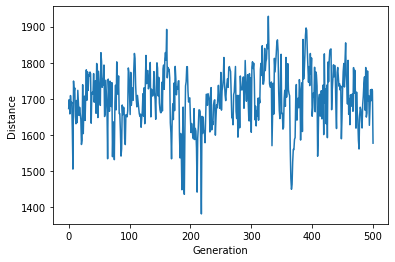

In [140]:
GeneticAlgorithm(cityList,50,15,0.01,500)